# Chapter 2 $LU$-Decomposition

In [ ]:
# numerical and scientific computing libraries  
import numpy as np 
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Let us create an $m\times n$ matrix not of full rank. One (easiest) way is generate two matrices $m\times k$ and $k \times n$ with $k < \min\{m,n\}$, and multiply them.

In [2]:
# create a random matrix of size m x n with the rank <= k <= min(m, n).
def create_random_matrix(m: int, n: int, k: int) -> np.ndarray:
    if k > min(m, n):
        raise ValueError("k must be less than or equal to min(n, m)")
    A = np.random.randn(m, k)
    B = np.random.randn(k, n)
    return A@B

The following is a function testing the **numpy.linalg.lu function**.

In [3]:
# perform LU decomposition on a random matrix of rank k <= min(n, m).
# check that the product of L and U is equal to the original matrix.
# check that the rank of L and U is equal to k.
def test_lu_decomposition(m: int, n: int, k: int):
    A = create_random_matrix(m, n, k)
    
    P, L, U = sp.linalg.lu(A)
    Q = P.T

    error = np.linalg.norm(Q@A - L@U)
    rank_l = np.linalg.matrix_rank(L)
    rank_u = np.linalg.matrix_rank(U)

    assert rank_u == k, f"Rank of U is not equal to {k} ({rank_u})"
    # check whether error is small enough using the machine epsilon
    assert error <= n * m * np.finfo(float).eps, f"Error is too large ({error})"

    return A, Q, L, U, error

Let us create many $10\times 11$ matrix of rank 7, and check the accuracy of $LU$-decomposition.

In [4]:
m=10
n=11
k=7
n_repeats = 10

# test LU decomposition with n, m and k for n_repeats times.
# collect LU decomposition errors and the ranks of U.
errors = []
ranks = []

for i in range(n_repeats):
    A, Q, L, U, error = test_lu_decomposition(m, n, k)
    errors.append(error)
    ranks.append(np.linalg.matrix_rank(U))

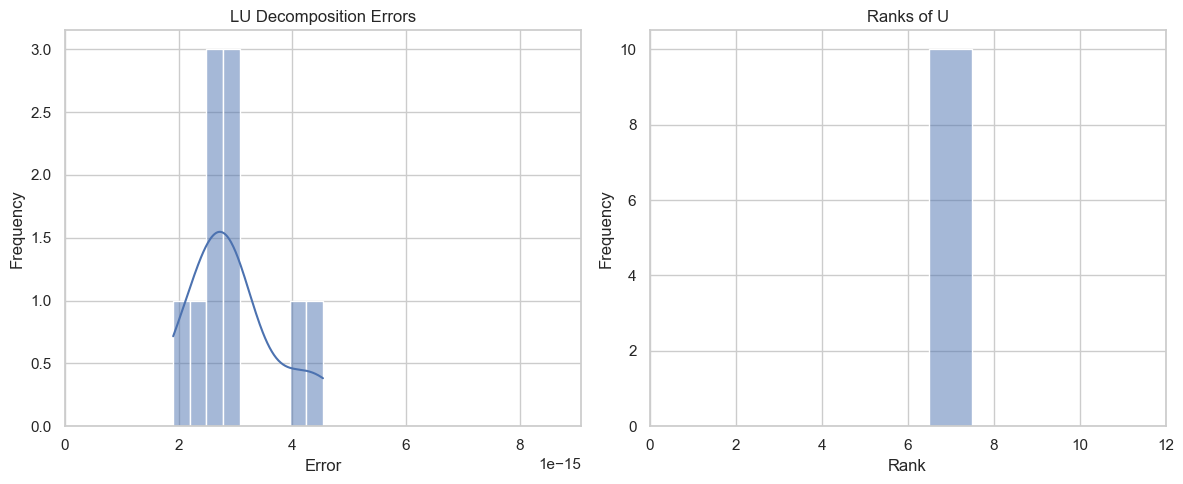

In [5]:
# plot the LU decomposition errors and the ranks of U as histograms.
# make the histogram visually pleasing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(errors, kde=True, ax=axs[0])
axs[0].set_title("LU Decomposition Errors")
axs[0].set_xlabel("Error")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim([0, np.max(errors) * 2.])

sns.histplot(ranks, kde=True, ax=axs[1])
axs[1].set_title("Ranks of U")
axs[1].set_xlabel("Rank")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0, np.max([n, m])+1)
plt.tight_layout()
plt.show()

In [6]:
# print out the final LU decomposition result in a pretty format.
print("Original matrix A:")
print(np.array2string(A, precision=2, suppress_small=True))
print("\nPermutation matrix Q:")
print(np.array2string(Q, precision=2, suppress_small=True))
print("\nLower triangular matrix L:")
print(np.array2string(L, precision=2, suppress_small=True))
print("\nUpper triangular matrix U:")
print(np.array2string(U, precision=2, suppress_small=True))
print(f"\nLU decomposition error: {error:.3e}")
print(f"Rank of A: {np.linalg.matrix_rank(A)}")
print(f"Rank of L: {np.linalg.matrix_rank(L)}")
print(f"Rank of U: {np.linalg.matrix_rank(U)}")

Original matrix A:
[[ 0.58  0.09  1.94  1.73  0.22  0.77 -1.59  0.18  0.24  0.93  0.8 ]
 [-1.54 -1.1  -5.72 -0.1   0.27 -3.94  1.17  3.63 -0.83  0.49  0.33]
 [-0.91 -1.71 -1.02 -2.61  0.79  1.2  -0.77 -1.95 -0.18  0.92 -0.52]
 [-1.86 -3.43  5.47 -0.49 -1.85  0.68 -3.29 -3.03  5.99  0.71  3.72]
 [-3.69 -2.21 -2.01  2.88  0.58  1.43 -2.66 -0.33  5.03  3.34 -2.24]
 [ 3.25  2.33  2.35 -1.08 -0.58  0.78  2.21 -1.84 -2.43 -2.65  0.14]
 [ 2.25 -1.35  5.42 -1.92 -3.16 -0.85  0.93 -3.21  1.71 -2.56  3.95]
 [-0.58  0.48 -2.31  0.03  1.59  1.3  -0.27 -0.17 -0.92  1.01 -2.16]
 [-2.24 -0.93  5.8   1.06 -1.89 -0.41 -2.51  2.6   3.1   0.46  2.29]
 [ 1.29  2.71  2.68  1.   -1.17  1.82  2.07 -2.51  1.67 -2.53 -1.8 ]]

Permutation matrix Q:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0